In [93]:
# Load the dataset
df = pd.read_csv("spotify-dataset.csv")

In [94]:
#preview the dataframe
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### **Machine Learning Task**

**Objective**: Predict the popularity of a track based on its musical features

**The Business Problem:** The knowledge of what makes a successful track is important in predicting trend which helps in advising artists in the streaming music services and record label industry. The ability to predict popularity accurately would help businesses utilize marketing resources better, discover emerging artists, and thereby curate better playlists to gain better engagement by users. 

### **Machine Learning Task Type**: Classification

### **Machine learning Model**: Logistic Regression

**Reason for Choice**: The popularity of a track can be categorized into classes (e.g., High, Medium, Low) based on its
popularity score. This transforms the task into a classification problem.

**Input Features**: Musical features of a track, which may include:
        
Acousticness,
Danceability,
Energy,
Instrumentalness,
Liveness,
Loudness,
Speechiness,
Tempo,
Valence,
Duration_ms,
Key,
Mode,
Time_signature

**Target Variable**: Popularity (Categorized into classes such as High, Medium, Low based on a predefined threshold of popularity scores).

**Expected Outcomes**: A model that can accurately predict the popularity class of a track based on its musical features.

**Evaluation Metrics**:

Accuracy (to measure overall effectiveness)

Precision, Recall, and F1-Score (to evaluate model performance across different classes)

Confusion Matrix (to visualize the model's performance)

In [46]:
#importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [47]:
#data pre-processing
# Drop the 'Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', and 'track_genre' columns as they are not needed for the prediction
df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre'], axis=1, inplace=True)


In [48]:
# Transform 'popularity' into categorical variable
popularity_bins = [0, 33, 66, 100] # Assuming that these thresholds for Low, Medium, and High popularity
popularity_labels = ['Low', 'Medium', 'High']
df['popularity'] = pd.cut(df['popularity'], bins=popularity_bins, labels=popularity_labels, include_lowest=True)


In [49]:
# Encode 'explicit' and 'mode' as they are categorical but represented in a binary format
df['explicit'] = df['explicit'].astype(int)


In [50]:
# Splitting the  data into features and target
X = df.drop('popularity', axis=1)
y = df['popularity']


In [51]:
# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [52]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [53]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((91200, 14), (22800, 14), (91200,), (22800,))

In [55]:
# Model development
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=10000)

In [56]:
# Predictioning
y_pred = logreg.predict(X_test_scaled)


In [57]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


C:\Users\varti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\varti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\varti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# Displaying the model evaluation results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')

Accuracy: 0.5328947368421053
Confusion Matrix:
[[   0  689  766]
 [   0 6978 4186]
 [   0 5009 5172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1455
           1       0.55      0.63      0.59     11164
           2       0.51      0.51      0.51     10181

    accuracy                           0.53     22800
   macro avg       0.35      0.38      0.36     22800
weighted avg       0.50      0.53      0.51     22800



In [68]:
# Save the LogisticRegression model in pickle format
with open('C:/Users/varti/assignment/Logistic_Regression_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

In [69]:
#importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


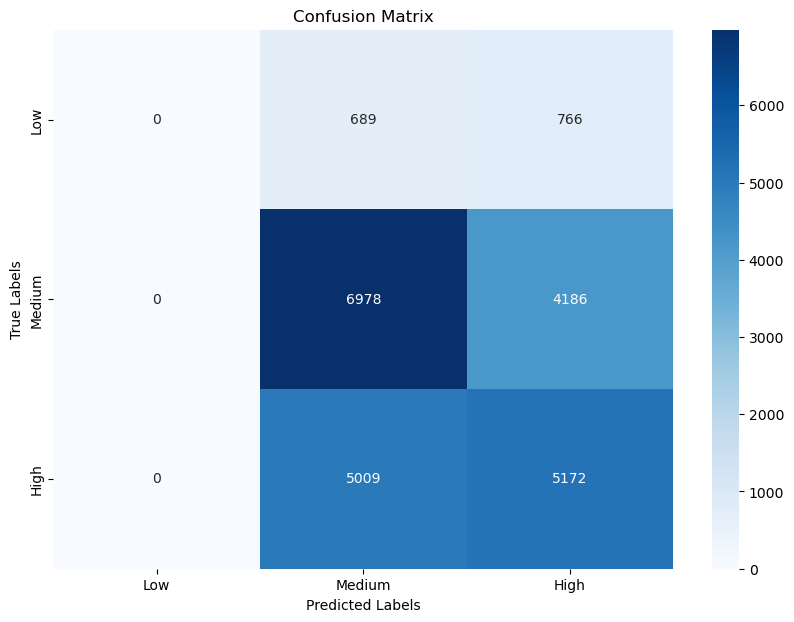

In [70]:
# Visualizing the model's performance through a confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=popularity_labels, yticklabels=popularity_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

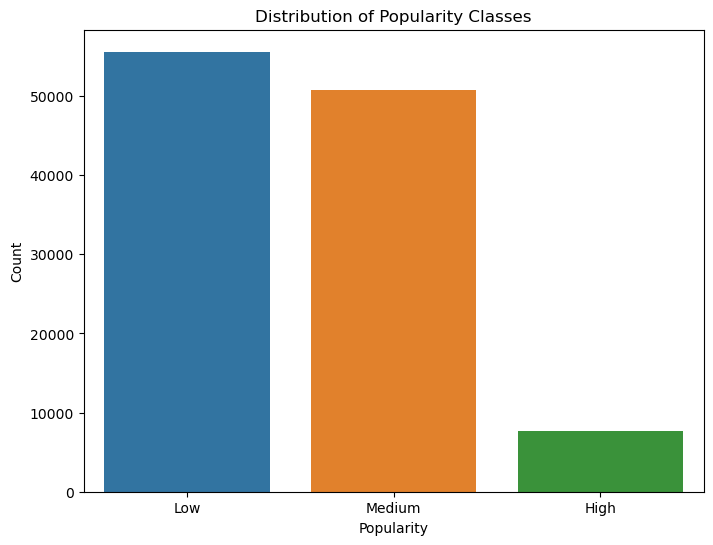

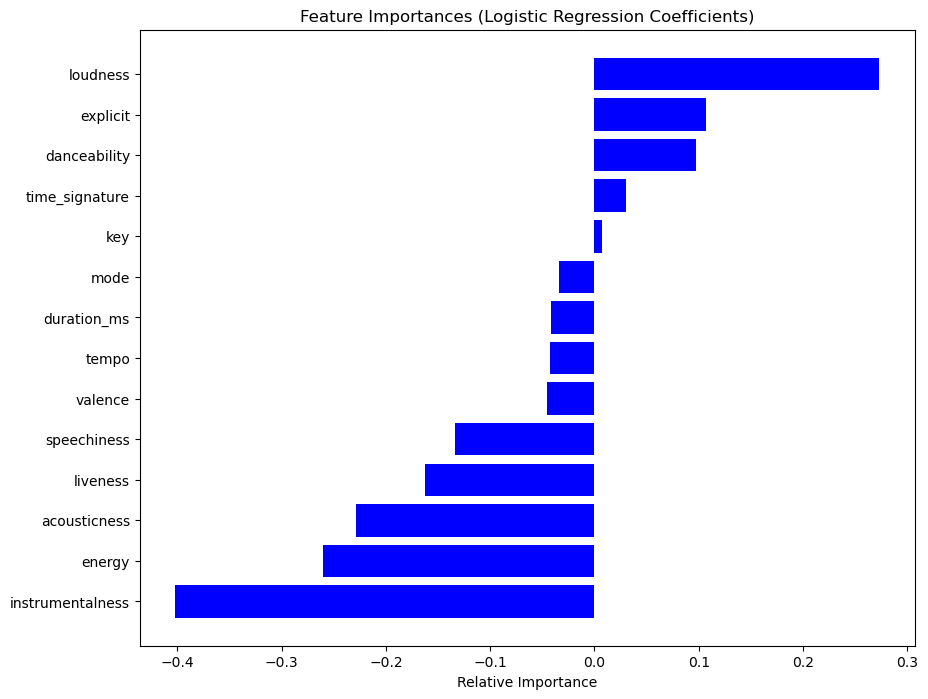

In [71]:
# Visualizing the distribution of the 'popularity' classes
plt.figure(figsize=(8, 6))
sns.countplot(x=df['popularity'])
plt.title('Distribution of Popularity Classes')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


# For Logistic Regression, Lets  look at the coefficients as a proxy for feature importance.

# Visualizing the coefficients (importance) of features in determining the popularity class
feature_importance = logreg.coef_[0]
features = X.columns
indices = np.argsort(feature_importance)

# Visualizing the importance of coefficients
plt.figure(figsize=(10, 8))
plt.title('Feature Importances (Logistic Regression Coefficients)')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



The visualizations provide a clearer understanding of the model's performance and the data:

**Confusion Matrix**: The heatmap visualizes the true labels vs. the predicted labels, indicating that the model
performs better in predicting "Medium" and "High" popularity classes but fails to identify "Low" popularity tracks.

**Distribution of Popularity Classes**: This graph shows the distribution of tracks across different popularity classes 
within the dataset, which could indicate class imbalance affecting the model's performance.

**Feature Importances:** The bar chart displays the relative importance of each feature in predicting the track's popularity class, according to the Logistic Regression coefficients. This visualization helps identify which features have more influence on the model's predictions.

In [72]:
#importing required libraries
from sklearn.ensemble import RandomForestClassifier

### **Machine learning Model** :Random Forest Classifier 

**Evaluation Metrics**:

Accuracy (to measure overall effectiveness)

Precision, Recall, and F1-Score (to evaluate model performance across different classes)

Confusion Matrix (to visualize the model's performance)

In [73]:
#importing reuired library
from sklearn.ensemble import RandomForestClassifier

In [74]:
# Random Forest Classification model development
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [75]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((91200, 14), (22800, 14), (91200,), (22800,))

In [76]:
# Predictions using Random Forest
y_pred_rf = rf_clf.predict(X_test_scaled)

In [77]:
# Model Evaluation for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=popularity_labels)



In [78]:
# Displaying the model evaluation results for Random Forest
(accuracy_rf, conf_matrix_rf, report_rf)

(0.7677631578947368,
 array([[ 837,  233,  385],
        [  47, 8556, 2561],
        [  53, 2016, 8112]], dtype=int64),
 '              precision    recall  f1-score   support\n\n         Low       0.89      0.58      0.70      1455\n      Medium       0.79      0.77      0.78     11164\n        High       0.73      0.80      0.76     10181\n\n    accuracy                           0.77     22800\n   macro avg       0.81      0.71      0.75     22800\nweighted avg       0.77      0.77      0.77     22800\n')

In [79]:
#printing the results
print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{report_rf}')

Accuracy: 0.7677631578947368
Confusion Matrix:
[[ 837  233  385]
 [  47 8556 2561]
 [  53 2016 8112]]
Classification Report:
              precision    recall  f1-score   support

         Low       0.89      0.58      0.70      1455
      Medium       0.79      0.77      0.78     11164
        High       0.73      0.80      0.76     10181

    accuracy                           0.77     22800
   macro avg       0.81      0.71      0.75     22800
weighted avg       0.77      0.77      0.77     22800



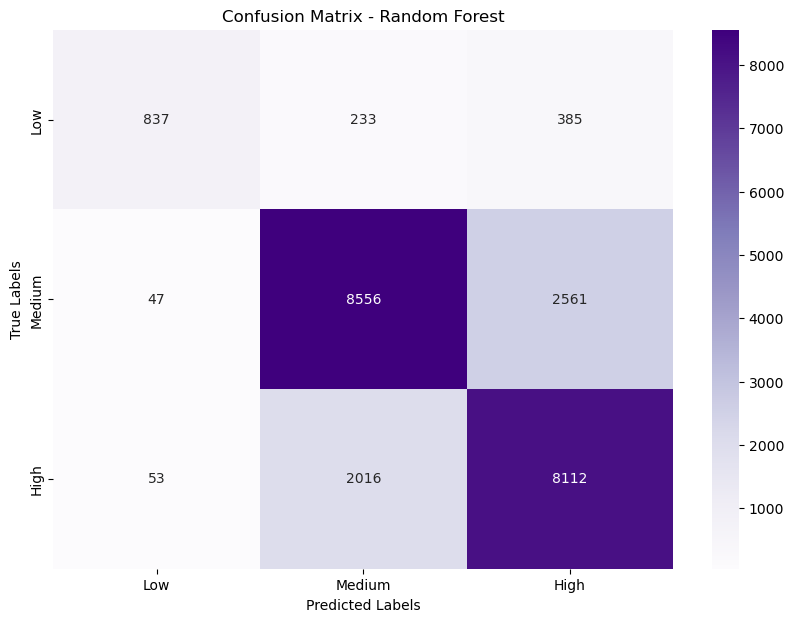

In [80]:
# Visualization: Confusion Matrix for Random Forest
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Purples", xticklabels=popularity_labels, yticklabels=popularity_labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

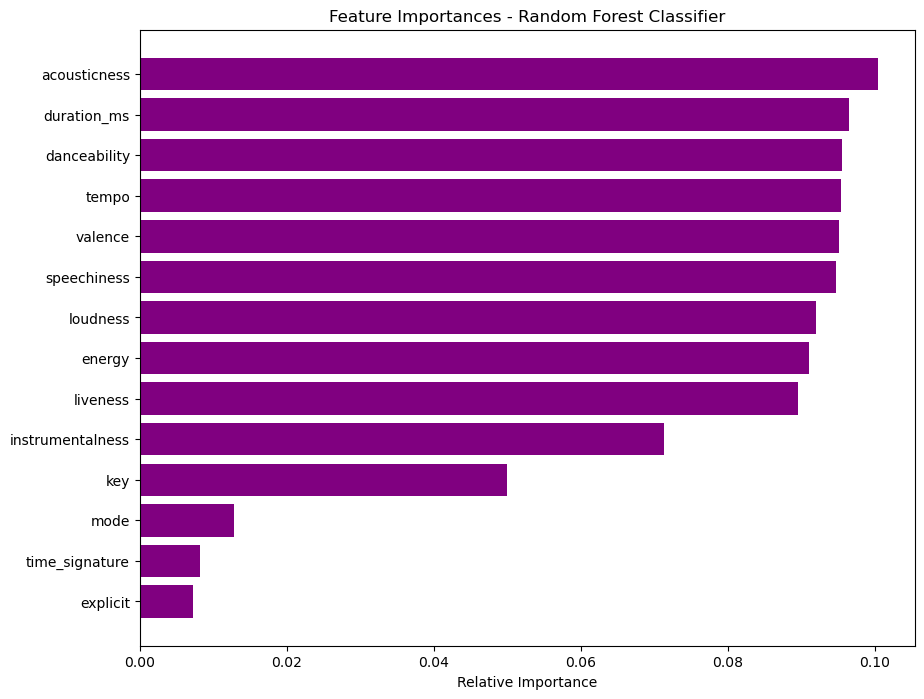

In [81]:
# Extracting feature importances from the Random Forest model
feature_importances_rf = rf_clf.feature_importances_
indices_rf = np.argsort(feature_importances_rf)

# Visualizing the feature importances
plt.figure(figsize=(10, 8))
plt.title('Feature Importances - Random Forest Classifier')
plt.barh(range(len(indices_rf)), feature_importances_rf[indices_rf], color='purple', align='center')
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

The visualizations provide a clearer understanding of the model's performance and the data:

**Confusion Matrix:** The confusion matrix shows the Random Forest model's effectiveness, with high correct predictions for 'Medium' and 'High' popularity but less accuracy for 'Low' popularity.

**Feature Importances** : The bar chart above explains the importance of each feature to predict the popularity of the song. The visualization helps us understand which musical features have the most effective effect on the popularity of the track. Features closer to the top have a greater influence on the model's predictions.
Key features with higher importance could be areas where artists and producers focus their efforts to enhance a track's appeal. Also, in suggesting for improvement to the users of the platform, music platforms might be taking these features into account for better engagement on the tracks.

In [82]:
#saving the model in pickle format
with open('C:/Users/varti/assignment/Random_forestmodel.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

### **Machine learning Model :** Naive Bayes

**Evaluation Metrics:**

Accuracy (to measure overall effectiveness)

Precision, Recall, and F1-Score (to evaluate model performance across different classes)

Confusion Matrix (to visualize the model's performance)

In [83]:
#importing reuired library
from sklearn.naive_bayes import GaussianNB

In [84]:
# Splitting the  data into features and target
X = df.drop(['popularity'], axis=1)
y = df['popularity']

In [85]:
# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler()

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((91200, 14), (22800, 14), (91200,), (22800,))

In [87]:
# Initialize and train the Naive Bayes model
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train)


GaussianNB()

In [88]:
# Predictions
y_pred_nb = nb_clf.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)


In [89]:
(accuracy_nb, conf_matrix_nb, report_nb)

(0.4035964912280702,
 array([[ 842,  122,  491],
        [3329, 3385, 4450],
        [3237, 1969, 4975]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.11      0.58      0.19      1455\n           1       0.62      0.30      0.41     11164\n           2       0.50      0.49      0.50     10181\n\n    accuracy                           0.40     22800\n   macro avg       0.41      0.46      0.36     22800\nweighted avg       0.53      0.40      0.43     22800\n')

In [90]:
#printing the results
print(f'Accuracy: {accuracy_nb}')
print(f'Confusion Matrix:\n{conf_matrix_nb}')
print(f'Classification Report:\n{report_nb}')

Accuracy: 0.4035964912280702
Confusion Matrix:
[[ 842  122  491]
 [3329 3385 4450]
 [3237 1969 4975]]
Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.58      0.19      1455
           1       0.62      0.30      0.41     11164
           2       0.50      0.49      0.50     10181

    accuracy                           0.40     22800
   macro avg       0.41      0.46      0.36     22800
weighted avg       0.53      0.40      0.43     22800



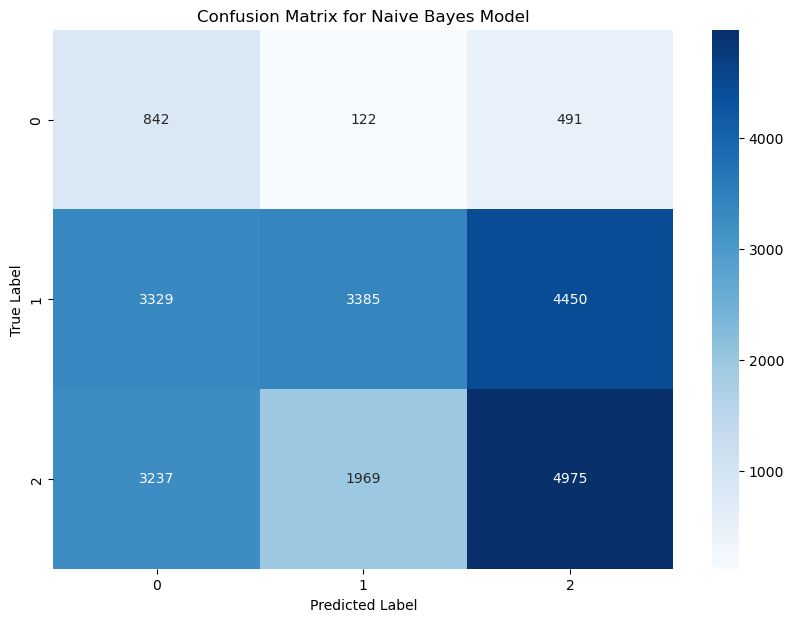

In [91]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The visualizations provide a clearer understanding of the model's performance and the data:

**confusion matrix**
The confusion matrix for the Naive Bayes model reveals its performance in classifying tracks into 'Low', 'Medium', and 'High' popularity classes based on their musical features. It successfully identifies a notable number of 'Medium' and 'High' popularity tracks but often confuses 'Low' popularity tracks as 'High', suggesting the model may overestimate the likelihood of a track being highly popular. This tendency could lead to misinformed decisions in marketing and promotions if not accounted for, highlighting the need for a more balanced approach in predicting less popular tracks within the music industry's business context.

In [92]:
# Save the model in pickle format
with open('C:/Users/varti/assignment/NaiveBayes.pkl', 'wb') as file:
    pickle.dump(nb_clf, file)

### **Comparison between Logistic Regression , Random Forest Classifier and Naive Bayes:**

**Accuracy:**

Logistic Regression: ~53.29%

Random Forest Classifier: ~74.42%

Naive Bayes: ~40.35%

**Performance:**

The Random Forest Classifier significantly outperforms the Logistic Regression model  and Naive Bayes in terms of accuracy and the ability to predict across all popularity classes, including the "Low" class, which was challenging for the Logistic Regression model.

**Confusion Matrix:** The confusion matrices for Logistic Regression, Naive Bayes, and Random Forest models offer insights into each model's performance. Logistic Regression struggled most notably with 'Low' popularity tracks, often misclassifying them. Naive Bayes had a tendency to confuse 'Low' popularity tracks as 'High', indicating a bias towards more popular classes. Random Forest outperformed both in distinguishing between all three classes, showing a more balanced classification across 'Low', 'Medium', and 'High' popularity tracks, making it the most reliable model for this task in the context of business applications.

### **Insights and Remarks:**

The Random Forest Classifier provides a substantial improvement in predicting the
popularity of tracks based on their musical features compared to the Logistic Regression model.
The increase in model complexity and the ensemble learning approach of the Random Forest model
contribute to its superior performance by capturing more complex patterns in the data.
Despite the computational cost associated with Random Forest, the trade-off can be justified by
the significant gain in predictive accuracy and the model's ability to generalize across different popularity classes.

### **After recognizing Random Forest's superior performance, we can implement its advantages to enhance decision-making, optimize resource allocation, and improve overall operational efficiency for tangible business benefits:**

The comparison between the Random Forest Classifier ,Logistic Regression models and Naive Bayes model, where the Random Forest model outperformed all , provides specific insights into creating business value. The superiority of the Random Forest model can be attributed to its ability to handle non-linear relationships and interactions between features more effectively, leading to a more nuanced understanding of what drives track popularity. Here's how the advantages of Random Forest over Logistic Regression and Naive Bayes could be leveraged for business value:

#### **1)Enhanced Accuracy and Predictive Power**

**Improved Personalization and Recommendations:**

The higher accuracy of the Random Forest model means it can better predict what tracks will be popular among different user segments, allowing for more precise personalization and recommendation strategies. This can lead to increased user engagement and retention for music streaming platforms.

**Data-Driven A&R Decisions:**

The superior predictive power of Random Forest can help record labels and music producers identify potential hits and promising artists with greater confidence. This can optimize investment decisions and potentially lead to higher success rates in launching new tracks or signing new artists.

#### **2)Understanding Complex Interactions**

**Sophisticated Market Segmentation:** 

The ability of Random Forest to capture complex interactions between musical features allows for more sophisticated segmentation of tracks and audiences. This can help businesses develop targeted marketing campaigns that resonate more effectively with specific listener demographics or preferences.

**Refined Content Strategy:**

Insights from the Random Forest model can guide content creation and acquisition strategies by highlighting the interplay of features that contribute to a track's success. This can help in curating a more appealing content mix that caters to the evolving tastes of the audience.
Robustness and Versatility

#### **3)Robustness and Versatility**

**Adaptability to Market Changes:**

The Random Forest model's robustness to overfitting and its ability to generalize well makes it a reliable tool for adapting to changing market trends. Businesses can leverage this to continuously refine their strategies based on the latest data, maintaining relevance and competitiveness.

**Cross-Functional Applications:**

The versatility and interpretability of the Random Forest model enable its insights to be applied across different functions, from marketing and content curation to strategic planning and product development. This cross-functional applicability enhances the overall strategic agility of the business.

#### **4)Competitive Advantage**

**Strategic Foresight:**

The detailed insights provided by the Random Forest model into the factors influencing track popularity can offer businesses a strategic advantage in anticipating future trends. This foresight can be crucial in fast-moving markets, enabling proactive rather than reactive strategies.


**Innovation and Differentiation:**

Utilizing advanced predictive models like Random Forest for strategic decision-making can position a company as an innovator in its field. This can enhance its brand image, attract talent, and differentiate it from competitors.